In [14]:
import keras

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


import matplotlib.pyplot as plt

In [15]:
batch_size = 64
num_classes = 10
epochs = 10

In [16]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [17]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train.shape[:]

(50000, 32, 32, 3)

In [20]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [23]:
optimizer = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False)

In [24]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
train_CNN = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, shuffle=True)

Epoch 1/10
625/625 [==============================] - 31s 48ms/step - loss: 1.9297 - accuracy: 0.2979 - val_loss: 1.6323 - val_accuracy: 0.4042
Epoch 2/10
625/625 [==============================] - 27s 43ms/step - loss: 1.5336 - accuracy: 0.4464 - val_loss: 1.3957 - val_accuracy: 0.5060
Epoch 3/10
625/625 [==============================] - 28s 44ms/step - loss: 1.4003 - accuracy: 0.4958 - val_loss: 1.2712 - val_accuracy: 0.5452
Epoch 4/10
625/625 [==============================] - 27s 42ms/step - loss: 1.2860 - accuracy: 0.5359 - val_loss: 1.1513 - val_accuracy: 0.6107
Epoch 5/10
625/625 [==============================] - 26s 42ms/step - loss: 1.2140 - accuracy: 0.5661 - val_loss: 1.0954 - val_accuracy: 0.6208
Epoch 6/10
625/625 [==============================] - 27s 42ms/step - loss: 1.1562 - accuracy: 0.5877 - val_loss: 1.0735 - val_accuracy: 0.6265
Epoch 7/10
625/625 [==============================] - 26s 42ms/step - loss: 1.1059 - accuracy: 0.6094 - val_loss: 1.0034 - val_accuracy:

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0         
                                                        

In [43]:
print(train_CNN.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


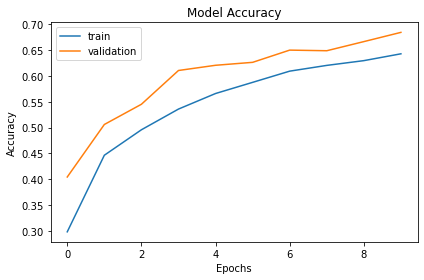

In [46]:
plt.plot(train_CNN.history['accuracy'])
plt.plot(train_CNN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

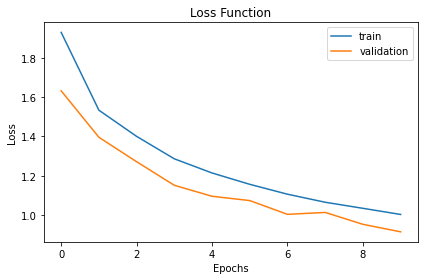

In [30]:
plt.plot(train_CNN.history['loss'])
plt.plot(train_CNN.history['val_loss'])
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [32]:
test_CNN = model.evaluate(X_test, y_test, batch_size=batch_size)

157/157 [==============================] - 2s 14ms/step - loss: 0.9143 - accuracy: 0.6792


In [33]:
print("Accuracy on test data:",  test_CNN[1])
print("Value of our Loss Function on test data:", test_CNN[0])


Accuracy on test data: 0.6791999936103821
Value of our Loss Function on test data: 0.9142861366271973
